In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
movies = pd.read_csv('./data/tmdb_5000_movies.csv')
credits = pd.read_csv('./data/tmdb_5000_credits.csv')

In [4]:
movies.shape, credits.shape

((4803, 20), (4803, 4))

In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies = movies.merge(credits, left_on=['id', 'title'], right_on=['movie_id', 'title'])

In [8]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## 전처리
- title, cast, genres, keywords, overview
- cast, genres, keywords : json

In [9]:
eval(movies.genres[0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [10]:
names = []
for c in eval(movies.genres[0]):
    names.append(c['name']) 
names


['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [11]:
def get_items(x, name):
    names = []
    cnt = 0
    for c in eval(x):
      if cnt == 3:
        return names
      names.append(c[name]) #?
      cnt += 1

    return names

In [12]:
movies['genres'] = movies['genres'].apply(get_items, args=('name',)) # 튜플을 명시하기위해 , 로
# 첫 매개변수로는 데이터프레임의 series 즉 컬럼 데이터가 들어간다. 

In [13]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
eval(movies.cast[0])

movies['cast'] = movies['cast'].apply(get_items, args=('name',))

In [15]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:

movies['keywords'] = movies['keywords'].apply(get_items, args=('name',))
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [18]:
columns = ['title', 'cast', 'genres', 'keywords', 'overview']
data = movies[columns]
data.head()

,title,cast,genres,keywords,overview
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]","[culture clash, future, space war]","In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]","Captain Barbossa, long believed to be dead, ha..."
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]","[spy, based on novel, secret agent]",A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",Following the death of District Attorney Harve...
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]","John Carter is a war-weary, former military ca..."


In [19]:
data['overview'] = data['overview'].str.split()

/var/folders/3b/zs648yxd3fj1tdtw8l75ywy00000gn/T/ipykernel_51512/1347949043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['overview'] = data['overview'].str.split()


In [20]:
data.head()

,title,cast,genres,keywords,overview
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]","[culture clash, future, space war]","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]","[Captain, Barbossa,, long, believed, to, be, d..."
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]","[spy, based on novel, secret agent]","[A, cryptic, message, from, Bond’s, past, send..."
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]","[Following, the, death, of, District, Attorney..."
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]","[John, Carter, is, a, war-weary,, former, mili..."


In [21]:
def replace_space(x):
    for i in range(len(x)):
        x[i] = x[i].replace(' ','')
    return x

In [22]:
data['genres'] = data['genres'].apply(replace_space)
data['cast'] = data['cast'].apply(replace_space)
data['keywords'] = data['keywords'].apply(replace_space)
data.head()

/var/folders/3b/zs648yxd3fj1tdtw8l75ywy00000gn/T/ipykernel_51512/4284058690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genres'].apply(replace_space)
/var/folders/3b/zs648yxd3fj1tdtw8l75ywy00000gn/T/ipykernel_51512/4284058690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cast'] = data['cast'].apply(replace_space)
/var/folders/3b/zs648yxd3fj1tdtw8l75ywy00000gn/T/ipykernel_51512/4284058690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,title,cast,genres,keywords,overview
0,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[Action, Adventure, Fantasy]","[cultureclash, future, spacewar]","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland]","[Captain, Barbossa,, long, believed, to, be, d..."
2,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent]","[A, cryptic, message, from, Bond’s, past, send..."
3,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman]","[Action, Crime, Drama]","[dccomics, crimefighter, terrorist]","[Following, the, death, of, District, Attorney..."
4,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion]","[John, Carter, is, a, war-weary,, former, mili..."


In [23]:
data['words'] = data['genres'] + data['cast'] + data['keywords'] + data['overview']
data.head()
# null 인게 하나라도 있다면 words는 null이 된다.



/var/folders/3b/zs648yxd3fj1tdtw8l75ywy00000gn/T/ipykernel_51512/2244531845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words'] = data['genres'] + data['cast'] + data['keywords'] + data['overview']


,title,cast,genres,keywords,overview,words
0,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[Action, Adventure, Fantasy]","[cultureclash, future, spacewar]","[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, SamWorthington, Z..."
1,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland]","[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action, JohnnyDepp, Orlan..."
2,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent]","[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime, DanielCraig, Christ..."
3,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman]","[Action, Crime, Drama]","[dccomics, crimefighter, terrorist]","[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, ChristianBale, MichaelC..."
4,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion]","[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction, TaylorKits..."


## 결측치 확인

In [24]:
data.isnull().sum() # sum() 은 열 단위 합인가?

title       0
cast        0
genres      0
keywords    0
overview    3
words       3
dtype: int64

In [25]:
data = data.loc[data['words'].isna()==False]

In [26]:
data['words'] = data['words'].apply(lambda x: " ".join(x))

## TF-IDF 이용한 TMDB 영화 추천 시스템 구현

In [ ]:
# TfidfVectorizer는 텍스트 데이터를 TF-IDF 행렬로 변환하는 도구입니다.
# stop_words='english'는 영어의 불용어(the, is, at 등 의미없는 단어)를 제거합니다.
# 이를 통해 영화 추천에 중요한 단어들의 가중치를 계산할 수 있습니다.
tfidf = TfidfVectorizer(stop_words='english')
# TF-IDF 행렬로 변환하면 (문서 개수 x 단어 개수) 크기의 희소 행렬(sparse matrix)이 생성됩니다.
# 각 문서는 행, 각 단어는 열이 되며 값은 TF-IDF 점수입니다.
tfidf_matrix = tfidf.fit_transform(data['words'])


print(tfidf_matrix.shape)
print(tfidf_matrix[0])

(4800, 28463)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 24 stored elements and shape (1, 28463)>
  Coords	Values
  (0, 521)	0.07776739385998294
  (0, 680)	0.09028004297269698
  (0, 9189)	0.11521433091062594
  (0, 22478)	0.24350895380908752
  (0, 28421)	0.223491929715986
  (0, 23500)	0.21122089292607676
  (0, 6076)	0.24849351347860263
  (0, 10124)	0.15414555255921739
  (0, 24060)	0.27090686569429784
  (0, 228)	0.25438899626140155
  (0, 4304)	0.16555425472295845
  (0, 19023)	0.24849351347860263
  (0, 16163)	0.21122089292607676
  (0, 7298)	0.23197564404570636
  (0, 17396)	0.2050430010810052
  (0, 18982)	0.24350895380908752
  (0, 26787)	0.2010785775002908
  (0, 17209)	0.14805644265838355
  (0, 26059)	0.19868224937769716
  (0, 9720)	0.17929312136478776
  (0, 18657)	0.21122089292607676
  (0, 20383)	0.22109560159339234
  (0, 998)	0.16597149447445725
  (0, 4834)	0.22608016126290742


In [31]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)


(4800, 4800)


In [39]:
# 영화제목으로 유사한 영화를 가져오는 함수 정의
title = 'Avatar'
idx = data[data['title'] == title].index[0]

# 모든 영화에 대한 해당 영화 유사도 가져오기
sim_scores = list(enumerate(cosine_sim[idx]))

# 유사도 기준으로 정렬
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# 가장 유사한 10개의 영화 추출
sim_scores = sim_scores[1:11]
print(sim_scores)

movie_indices = [i[0] for i in sim_scores]
data['title'].iloc[movie_indices] # iloc 인덱스 기반 슬라이싱



[(3603, np.float64(0.14353330727681637)), (942, np.float64(0.12346670249233897)), (2130, np.float64(0.10815369887612684)), (1341, np.float64(0.10528605993768518)), (3723, np.float64(0.0971331070512779)), (634, np.float64(0.09688021818078385)), (529, np.float64(0.09647008975695785)), (311, np.float64(0.09614927683032722)), (775, np.float64(0.08879259816626864)), (466, np.float64(0.08665941124600629))]


3604                       Apollo 18
942                 The Book of Life
2130                    The American
1341            The Inhabited Island
3724                   Falcon Rising
634                       The Matrix
529                 Tears of the Sun
311     The Adventures of Pluto Nash
775                        Supernova
466                 The Time Machine
Name: title, dtype: object

In [40]:
# 함수화 진행

# title : 영화 제목, movies : 영화 데이터프레임, cosine_sim : 코사인 유사도 행렬
def get_recommendations(title, movies, cosine_sim = cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]
    

In [41]:
recommendations = get_recommendations('The Dark Knight Rises', movies)
print(recommendations)

65                         The Dark Knight
299                         Batman Forever
428                         Batman Returns
1359                                Batman
119                          Batman Begins
3853                                  2:13
2507                             Slow Burn
210                         Batman & Robin
9       Batman v Superman: Dawn of Justice
1181                                   JFK
Name: title, dtype: object


In [51]:
recommendations = get_recommendations('Avatar', movies)
print(recommendations)

3603               Lone Wolf McQuade
942                 The Book of Life
2130                    The American
1341            The Inhabited Island
3723            Anne of Green Gables
634                       The Matrix
529                 Tears of the Sun
311     The Adventures of Pluto Nash
775                        Supernova
466                 The Time Machine
Name: title, dtype: object


## 추천 결과 시각화

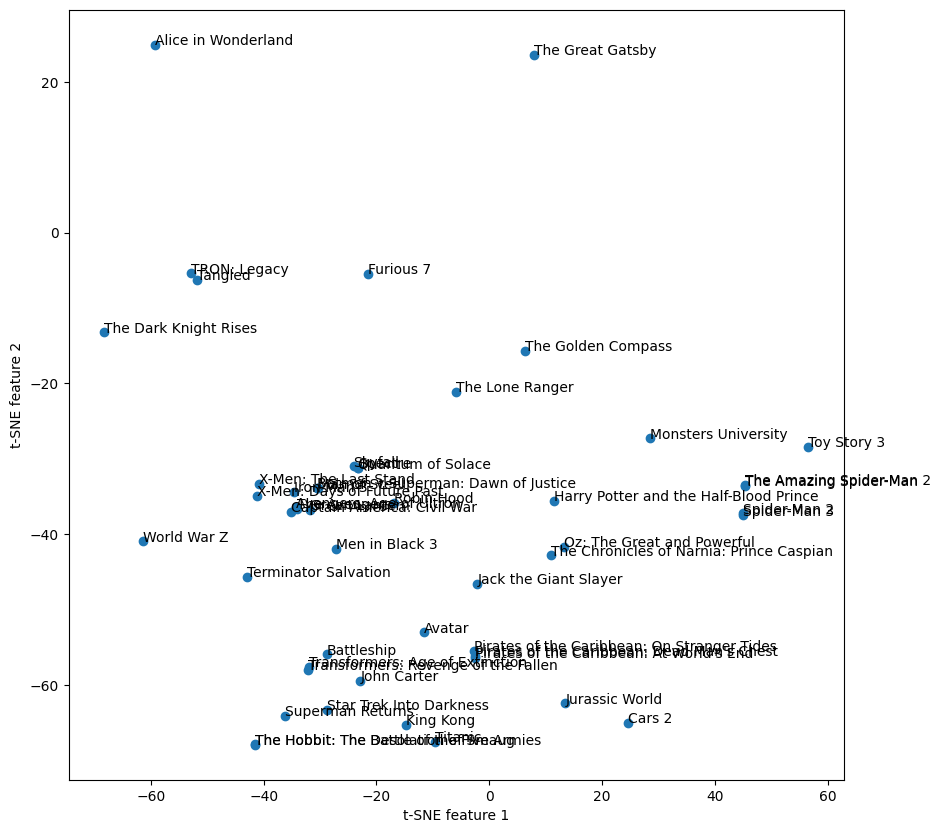

In [54]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

num_data = 50

#차원 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(tfidf_matrix.toarray())[:num_data]

# 시각화
plt.figure(figsize=(10, 10))
# X_tsne[:, 0]는 t-SNE로 차원 축소된 데이터의 첫 번째 컬럼(feature 1)을 의미
# X_tsne[:, 1]는 두 번째 컬럼(feature 2)을 의미
# 즉 2차원으로 축소된 데이터의 x, y 좌표값으로 산점도를 그림
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='o')
for i, txt in enumerate(data['title'][:num_data]):
    plt.annotate(txt, (X_tsne[i, 0], X_tsne[i, 1]))

plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()
